### Plots of kernels and their gradients evaluated in 1D [![Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/tumaer/jax-sph/blob/main/notebooks/kernel_plots.ipynb)

Evaluate the kernels and their derivatives.

In [1]:
import jax.numpy as jnp
import matplotlib.pyplot as plt
from jax import vmap

from jax_sph.kernel import (
    CubicKernel,
    GaussianKernel,
    QuinticKernel,
    SuperGaussianKernel,
    WendlandC2Kernel,
    WendlandC4Kernel,
    WendlandC6Kernel,
)

In [2]:
t = jnp.linspace(0,3, 100)
kernels = [
    (CubicKernel, 1),
    (QuinticKernel, 1),
    (WendlandC2Kernel, 1.3),
    (WendlandC4Kernel, 1.3),
    (WendlandC6Kernel, 1.3),
    (GaussianKernel, 1),
    (SuperGaussianKernel, 1),
    ]
w = []
w_grad = []
for k in kernels:
    kernel_fn = k[0](k[1], 1)
    w.append(vmap(kernel_fn.w)(t))
    w_grad.append(vmap(kernel_fn.grad_w)(t))

Visualize kernels.

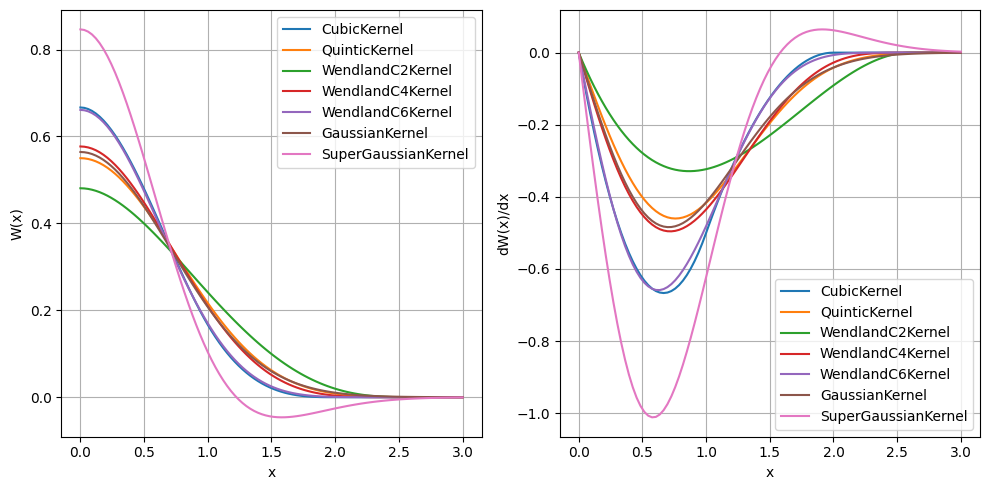

In [3]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
for i in range(jnp.shape(w)[0]):
    axs[0].plot(t, w[i], label=str(kernels[i][0].__name__))
    axs[1].plot(t, w_grad[i], label=str(kernels[i][0].__name__))

for ax in axs:
    ax.set_xlabel("x")
    ax.legend()
    ax.grid()

axs[0].set_ylabel("W(x)")
axs[1].set_ylabel("dW(x)/dx")
plt.tight_layout()
plt.show()